# Reproduction of PNNL Simulations

file:///Users/charlesmartin14/Downloads/TAP-BEC-02-08-13FinalReport%20(2).pdf

For a review of the basic physics, see

https://arxiv.org/pdf/0911.0058.pdf

In [59]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

may need to use arbitrary precision library

http://stackoverflow.com/questions/29488213/handling-very-small-numbers-in-python

#### constants

In [60]:
pi = np.pi

# Hbar * c 
hbarc = 197.3269631 # MeV−fm

# ?
rc = 299792458 # m/s
alpha = 7.2973525376*1e-3
e = 1.602176487*1e-13 # J/MeV

# Avagadro's number
dN0 = 6.02214179*1e23 # molˆ−1

# Masses of proton, neutron, elecron in MeV
dMp = 938.272013 # MeV
dMn = 939.565346 # MeV
dme = 0.510998910 # MeV


dmnu = 1.e-8 # MeV
dMd = 1875.612793 # MeV
GF = 1.16637*1e-11 # 1/MeVˆ2
GV = 1.0 # 1.013 d0
GA = -1.285*GV # −1.267
gnpd = 10.6617553 #  11.3 in 9704031 v5 . pdf (pg 8−9)
dkapp= 1.793 
dkapn= -1.913
dufac= 0.0

#### Mass of Neutron - Proton (in MeV)

In [61]:
print dMp - dMn, "MeV"

-1.293333 MeV


#### Mass of Proton + Electron - Neutron (in MeV, KeV)

782 KeV needed

In [62]:
Ediff = (dMp + dme - dMn)
print Ediff*1000.0, "KeV"
print Ediff, "MeV"

-782.33409 KeV
-0.78233409 MeV


### Expected confinement by uncertainty principle

$$\Delta x\Delta p\geq\dfrac{\hbar}{2}$$


see https://en.wikipedia.org/wiki/Planck_constant

$$\hbar=\dfrac{h}{2\pi}$$

$$\hbar c=197.3269631\; MeV\;fm$$

$$1\;fm=10^{−15}\;m=10^{-5}\;\mathring{A}$$

$$\Delta p=E_{diff}=|M_{p}+M_{e}-M_{n}|=1.293333\;MeV$$

So the expected confinment is on the order of:


$$\Delta x\geq \dfrac{\hbar}{2\Delta p}$$

$$\Delta x\sim\mathcal{O}(\dfrac{\hbar}{2 E_{diff}})\sim 0.00126\;\mathring{A}$$



In [63]:
print (-hbarc/(2.*Ediff))*10**(-5), "Angstrom"

0.00126114255803 Angstrom


#### This seems 10X off from our last calculations ?

And it turns out to be about 5X off 

### We will find that the necessary confimement is 0.009 Angstrom

$$\Delta x=0.009\;\mathring{A}$$

which yields

$$\Delta p\geq \dfrac{\hbar}{2\Delta x}$$

$$\Delta p\geq \dfrac{\hbar}{2*0.009\;\mathring{A}}\sim 123.3\;MeV$$


In [64]:
print "energy lower bound", 1000.0*(hbarc/(2.*0.008))*10**(-5), "Mev"

energy lower bound 123.329351938 Mev


In [106]:
x_max = 1e-5*hbarc*2/pmin
print "X_max crude =", x_max

X_max crude = 0.00332400071466


#### Note: the Radius of the proton  is

$$0.84–0.87\;fm<0.9\;x\;10^{-15}m$$
$$0.9\;x\;10^{-15}m\;x\;\dfrac{1\mathring{A}}{10^{-10}m}=9\;x\;10^{-5}\;\mathring{A}$$

so we stil have a long ways to go

### But the ballpark calculation does not get the energetics right

#### we are off by a factor of 2.7

In [176]:
rlconf_max = 9.0436055743778263e-3

In [177]:
print "factor off from Rick:", rlconf_max/x_max

factor off from Rick: 2.72069904633


### PNNL work

##### We confinement the proton and electron together in a box of size rlconf=(L) 


The basic idea is the confinement of the (H^{+},e^{-}) pairs  causes the momentum of the proton and electon to be unusually high, thereby enhancing the probability of an collision, leading to electron capture by the proton

But first, we need a quick review of Relativistic Kinematics

### Relativistic energy calculations

We need the Relativisitic Kinematics

http://www.phys.ufl.edu/~avery/course/4390/f2015/lectures/relativistic_kinematics_2.pdf

Which means working with energy-momentum 4 vectors

This is tricky, so it is helpful to first list a couple of basic relations

##### Relativistic Energy Relation

http://socrates.berkeley.edu/~phylabs/adv/ReprintsPDF/BRA%20Reprints/03%20-%20Beta%20Decay.pdf

$$ E_{e} = KE_{e} + m_{0}c^{2} $$


#### Energy-Momentum Relation

https://en.wikipedia.org/wiki/Energy%E2%80%93momentum_relation

$$ E^{2}=(pc)^{2}+(m_{0}c^{2})^{2} $$

Note that at rest, or in the center-of-mass frame, we recover the familiar Einstein relation

$$ E^{2}=mc^{2} $$


Set c=1 and just assume rest masses (M,m)

$$ E^{2}=p^{2}+m^{2} $$

We use capital M for protons and neutrons and small m for electrons and neutrinos. 



### Electron capture:  

$$ p+e\rightarrow n+\nu $$

$$\overrightarrow{P}_{n}+\overrightarrow{P}_{e}=\overrightarrow{P}_{n}+\overrightarrow{P}_{\nu} $$

### The threshold kinetic energy of the electron is 

 $$EKemin:\;\;K_{e}=E_{e}-m_{e}=\dfrac{(M_{n}−m_{e}+m_{\nu})^{2}−M^{2}_{p}}{2(M_{n}+m_{\nu})}$$
 


How did we get this?

We treat this similrly to 3-body decay, described in

 http://www.phys.ufl.edu/~avery/course/4390/f2015/lectures/relativistic_kinematics_2.pdf

Let Q be the combined neutron, neutrino products

$$ p+e\rightarrow Q $$

Treat electron capture similary to the 2-body decay (below Figure 1), giving

$$E_{e}=\dfrac{M^{2}+M^{2}_{n}-m^{2}_{e}}{2M_{Q}}$$

where M is the combined mass 

$$Q_{M}=M_{n}+m_{\nu}$$



### We use EKEmin to compute the maximum box size for confined electon capture

#### Using the Heisenberg Uncertantity principle

We use the uncertainty principle to obtain

$$ \Delta x\Delta p\ge \dfrac{\hbar}{2} $$


$$ x_{max}\sim \dfrac{\hbar}{2p_{min}} $$

Where we use EKEmin to compute pmin



#### Recompute X min for Relativisitic case

Since

$$E^{2}=M^{2}+p^{2}$$ 

$$p^{2}=E^{2}-M^{2}$$ 

$$p=\sqrt{E^{2}-M^{2}}$$ 


So we can define the minimum p


$$ pmin:\;\;\sqrt{E_{e}^{2}-m_{e}^{2}} $$

which becomes, in the PNNL code, 

$$ pmin:\;\;\sqrt{(K_{e}+m_{e})^{2}-m_{e}^{2}} $$

In [88]:
Ekemin = ((dMn + dmnu - dme)**2 - dMp**2)/(2.0*(dMn+dmnu))
pmin = np.sqrt(( Ekemin+dme)**2 - dme**2)
print "Kinetic Energy terms (EKemin, pmin)", Ekemin, pmin, "MeV"

Kinetic Energy terms (EKemin, pmin) 0.781582906698 1.18728592464 MeV


In [178]:
x_max_rel = 1.e-5*hbarc/(2.0*pmin)

In [179]:
print "X_max, relativistic =" , x_max_rel, " Angstrom"

X_max, relativistic = 0.000831000178666  Angstrom


### This is off by a factor of 10.8
We need to adjust for the particle in the box to fix this


In [180]:
print "factor off by ",rlconf_max/x_max_rel
print "this is 2*PI*Sqrt(3)",np.pi*2*np.sqrt(3)

factor off by  10.8827961853
this is 2*PI*Sqrt(3) 10.8827961854


### Particle in the box wavefunction


$$\phi_{p,e}(x)=\left(\dfrac{2}{L}\right)^{\frac{2}{3}}cos\left(\dfrac{x\pi}{L}\right)cos\left(\dfrac{y\pi}{L}\right)cos\left(\dfrac{z\pi}{L}\right)$$

The length L is the lattice scale at a specified compression.

#### Using our relativisitic relations from above, lets try to get rick's factor

 For the confined electron and proton

$$E^{2}=M^{2}+p^{2}$$

$$E^{2}_{e}=m^{2}_{e}+3\left(\dfrac{\pi}{L}\right)^{2}$$

$$E^{2}_{p}=M^{2}_{p}+3\left(\dfrac{\pi}{L}\right)^{2}$$

#### We define the box rlconf=(L) 

orginal Fortran code:  
<pre>
do iep =1,500
   pep =(pmin + dexp(dlog(1.d-11)+dfloat(iep)*
   (dlog(100.d0)-dlog(1.d-11))/500.d0))/ dsqrt(3.d0)
 
   rlconf = 1.d-5*hbarc*pi/pep 
</pre>

We need a grid from 0.0001 to 0.01 on a log scale

But we cut the grid off at ~ 0.009 because the Energies diverge


##### explaining the above code

We obtain the box size similar to what we did in the classical case, above



#### To get Rick's result, we have to adjust for the size of the box

He notes

$$E^{2}_{e}=m^{2}_{e}+3\left(\dfrac{\pi}{L}\right)^{2}$$

$$E^{2}_{e}-m^{2}_{e}=3\left(\dfrac{\pi}{L}\right)^{2}$$

$$\sqrt{(E^{2}_{e}-m^{2}_{e})}=\dfrac{\sqrt{3}\pi}{L}$$

$$p_{e}=p_{p}=\dfrac{\sqrt{3}\pi}{L}$$

In [172]:
np.sqrt(3)*np.pi*2

10.882796185405306

### We have to adjust pmin by a factor 

$$\sqrt{3}\pi$$

In [162]:
rlconf_max = (1e-5)*hbarc*np.pi*np.sqrt(3.0)/pmin
print "X_max , relativisitic, in box=", rlconf, " Angstrom"

X_max , relativisitic, in box= 0.00904360557446  Angstrom


### PNNL Parameters for Ni-H

In [67]:
densep = 7.0
dNiMW = 28.0 
dndens = dN0*densep/dNiMW
print densep , dndens 

7.0 1.5055354475e+23


### (I think) we compute boxes of increasing size

#### RLConf = Box confinment scale

in units L (A°)

In [68]:
rlconfs = []
peps = []
for iep in range(500):
    pgrid =  np.exp(np.log(1e-11)+(float(iep)/500.0)*(np.log(100.0)-np.log(1e-11)))
    pep = ( pmin + pgrid )/np.sqrt(3.0)
    peps.append(pep)
    rlconf = (1e-5)*hbarc*np.pi/pep
    rlconfs.append(rlconf)

In [133]:
print "Box dimensions: X_max =",rlconfs[0], " , X_min =",rlconfs[-1]

Box dimensions: X_max = 0.00904360557438  , X_min = 0.00011257882444


0.00904360557446


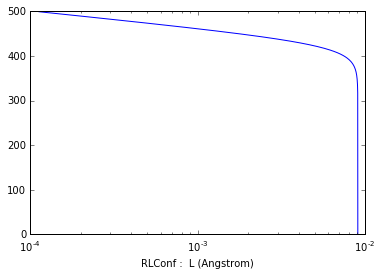

In [144]:
plt.semilogx(np.array(rlconfs), np.arange(0,500))
plt.xlabel("RLConf :  L (Angstrom)")

### Pep:  momentum of the (e,p) pair in the CM frame

I think

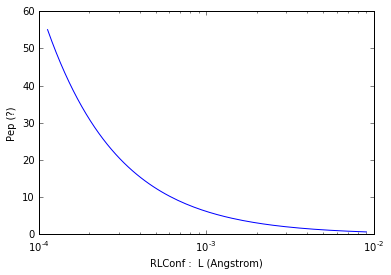

In [146]:
plt.semilogx(np.array(rlconfs), np.array(peps))
plt.xlabel("RLConf :  L (Angstrom)")
plt.ylabel("Pep (?)")

### V-A theory of the Weak Interaction

The V-A theory provides a way to compute the cross section for orbital (K) electron capture by the proton

This is just the quantum mechanical Golden Rule fomula, using the Dirac spinors (relativistic 4-vectors) and the associated (4x4) Gamma matrices, and the 'fundamental' constants 

The V-A theory contains specific corrections but is not the most complete theory.  Still, these minor corrections likely have no effect for our purposes.

#### electron capture cross section matrix elements in the V-A theory

$$M_{fi}=\dfrac{G_{F}}{\sqrt{2}}\bar{u}(p_{n},s_{n})(G_{V}-G_{A}\gamma^{5})\gamma^{\mu}u(p_{p},s_{p})\times\bar{u}(k,s_{k})\gamma_{u}(1-\gamma^{5})u(s_{e},p_{e})$$

where GF = 1.16637 × 10−5 GeV−2 and the neutron lifetime is reproduced with GA = 1
and Gv = −1.285.7 , and 
$$s_{n}, s_{p},s_{k},s_{e}$$
are 2-component spin vectors for the neutron, proton, nutrino, and electron, resp.



#### Implementing the calculations

We can use an open source physics packages to generate the Dirac Gamma Matrices

### Dirac Spinors

#### Relativistic 4-vectors for particles
$$u(\overrightarrow{p},s=up)=\sqrt{E+m}\left[\begin{array}{c}
0\\
1\\
\dfrac{p_{3}}{E+m}\\
\dfrac{p_{1}+ip_{2}}{E+m}
\end{array}\right]\;\;u(\overrightarrow{p},s=down)=\sqrt{E+m}\left[\begin{array}{c}
1\\
0\\
\dfrac{p_{1}-ip_{2}}{E+m}\\
\dfrac{-p_{3}}{E+m}
\end{array}\right]$$ 

#### Complex conjugates


In [72]:
# dirac spinors 
def spinu(p ,mass):
    s = np.diag([1,1])
    
    denom = p[0] + mass
    
    fac = np.sqrt(denom)
    phi = fac*cs
    
    wu = np.zeros([4,2], dtype=np.complex_)
    wu[0,0] = 1.0
    wu[1,1] = 1.0

    wu[2,0] = p[3] / denom
    wu[2,1] = (p[1] - p[2]*1.j) / denom
    wu[3,0] = (p[1] + p[2]*1.j) / denom
    wu[3,1] = -(p[3]) / denom

    u = wu*phi
    
    return u

In [73]:
# dirac spinors 
def spinu(p ,mass):
    s = np.diag([1,1])
    
    denom = p[0] + mass
    
    fac = np.sqrt(denom)
    phi = fac*cs
    
    wu = np.zeros([4,2], dtype=np.complex_)
    wu[0,0] = 1.0
    wu[1,1] = 1.0

    wu[2,0] = p[3] / denom
    wu[2,1] = (p[1] - p[2]*1.j) / denom
    wu[3,0] = (p[1] + p[2]*1.j) / denom
    wu[3,1] = -(p[3]) / denom

    u = wu*phi
    
    return u

### Dirac Gamma Matrices

These are (4x4) matrices used to compute the matrix elements

https://en.wikipedia.org/wiki/Gamma_matrices

we can obtain them from

http://docs.sympy.org/dev/modules/physics/matrices.html

these are related to the PNNL code as

<pre>
mgamma =  RSW cgamma, cgamma5
</pre>

If we need better performance, we can convert to numpy arrays

http://stackoverflow.com/questions/17069864/what-is-the-best-way-to-convert-a-sympy-matrix-to-a-numpy-array-matrix

<pre>
np.array(g).astype(np.float64)
</pre>


### Using SymPy

In [74]:
import sympy
from sympy import *
from sympy.physics.matrices import mgamma
mgamma(0)

Matrix([
[1, 0,  0,  0],
[0, 1,  0,  0],
[0, 0, -1,  0],
[0, 0,  0, -1]])

$$C_{left} = 1-\gamma^{5}$$

In [75]:
cleft = diag(1,1,1,1) -mgamma(5)
cleft

Matrix([
[ 1,  0, -1,  0],
[ 0,  1,  0, -1],
[-1,  0,  1,  0],
[ 0, -1,  0,  1]])

$$C_{GVGA} = G_{V}-G_{A}\gamma^{5}$$


In [76]:
cGVGA = diag(GV,GV,GV,GV) - GA*mgamma(5)
cGVGA

Matrix([
[  1.0,     0, 1.285,     0],
[    0,   1.0,     0, 1.285],
[1.285,     0,   1.0,     0],
[    0, 1.285,     0,   1.0]])

###  diagonal 2x2 matrices  used in PNNL code

In [77]:
cs1 = diag(1,1)
cs2 = diag(1,1)
cse = diag(1,1)
csk = diag(1,1)

In [78]:
### Stopped Here

In [79]:
def dgprod(ekn):
    dgprod = (5.2828)*(1e-5)/np.sqrt(ekn)
    dgprod = dgprod*1e-24 # cmˆ2
    return dgprod

In [80]:
#
#  redo as ?
#   cubar.dot(ca).dot(cu)
#
def ubaru( cubar , ca , cu , cscal ):
    cscal = 0.0
    for i1 in range(4):
        for i2 in range(4):
            cscal += cubar[i1]*ca[i1,i2]*cu[i2]
            


### Calculate Kinetic Energies of each particle 

- EKn = p1 (0) − dMn
- EKp = p2 (0) − dMp
- EKe = pe (0) − dme
- EKnu = pk(0) − dmnu



In [81]:
#  returns 4 vectors:  p1 , p2 , pe, pk 

#  assumes exactly cubic lattic:  pep1 = pep2 = pep3 = +|- pep
def pekin(x , phi , pep ):
    
    p1 = np.zeros(4)
    p2 = np.zeros(4)
    pe = np.zeros(4)
    pk = np.zeros(4)
    
    # proton
    p2[0] = dsqrt (dMp**2 + 3.0*pep**2)
    p2[1] = -pep
    p2[2] = -pep
    p2[3] = -pep
    
    # electron
    pe[0] = dsqrt (dme**2 + 3.0*pep**2)
    pe[1] = pep
    pe[2] = pep
    pe[3] = pep
    
    Etot = p2[0] + pe[0]

    Eknu = (( Etot-dmnu)**2 - dMn**2)/(2.0*Etot )
    Ekn = (( Etot-dMn)**2 - dmnu**2)/(2.0*Etot )
    pnu = np.sqrt((Eknu+dmnu)**2 - dmnu**2)
    
    pk[0] = Eknu + dmnu
    pk[1] = pnu*np.sqrt(1.0 - x**2)*cos(phi)
    pk[2] = pnu*np.sqrt(1.0 - x**2)*sin(phi)
    pk[3] = pnu*x
    
    # vector element wise addition
    # neutron
    p1 = p2 + pe - pk
    
    return p1, p2, pe, pk